# EDA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [130]:
dataset_path = "../datasets/heart_cleveland_upload.csv"
data = pd.read_csv(dataset_path)
print(f'Кол-во строк: {data.shape[0]}')
print(f'Кол-во столбцов: {data.shape[1]}')

Кол-во строк: 297
Кол-во столбцов: 14


## Описание признаков:

- `age` - возраст в годах
- `sex` - пол (1 = мужчина; 0 = женщина)
- `cp`  - тип боли в груди:
    - Значение 0: типичная стенокардия
    - Значение 1: атипичная стенокардия
    - Значение 2: неангинальная боль
    - Значение 3: бессимптомная

- `trestbps`  - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
- `chol`  - холесторал в сыворотке в мг / дл
- `fbs`  - (уровень сахара в крови натощак> 120 мг / дл) (1 = правда; 0 = ложь)
- `restecg`  - результаты электрокардиографии в состоянии покоя - Значение 0: нормальное
    - Значение 1: аномалия зубца ST-T (инверсия зубца T и / или подъем или депрессия ST> 0,05 мВ)
    - Значение 2: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса
        
- `thalach`  - достигнута максимальная частота сердечных сокращений
- `exang`  - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- `oldpeak`  - депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
- `slope`  - наклон сегмента ST при максимальной нагрузке
    - Значение 0: наклон вверх
    - Значение 1: плоский
    - Значение 2: наклон вниз
- `ca`  - количество крупных сосудов (0-3), окрашенных флуросопией
- `thal`  - 0 = норма; 1 = исправленный дефект; 2 = обратимый дефект и метка
- `condition`  - 0 = нет заболевания, 1 = заболевание

## Произведем подсчет значений равных `null`

In [116]:
statistics_by_column = {
    'column': [],
    "% null": [],
    "count": []
}

for cur_columns in data.columns:
    statistics_by_column["% null"].append(data[cur_columns].isna().sum()/len(data)*100)
    statistics_by_column["count"].append(len(data))
    statistics_by_column["column"].append(cur_columns)

dataframe_stat = pd.DataFrame(data = statistics_by_column)
dataframe_stat.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
% null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,297,297,297,297,297,297,297,297,297,297,297,297,297,297


# Построим диаграммы распределения всех признаков

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

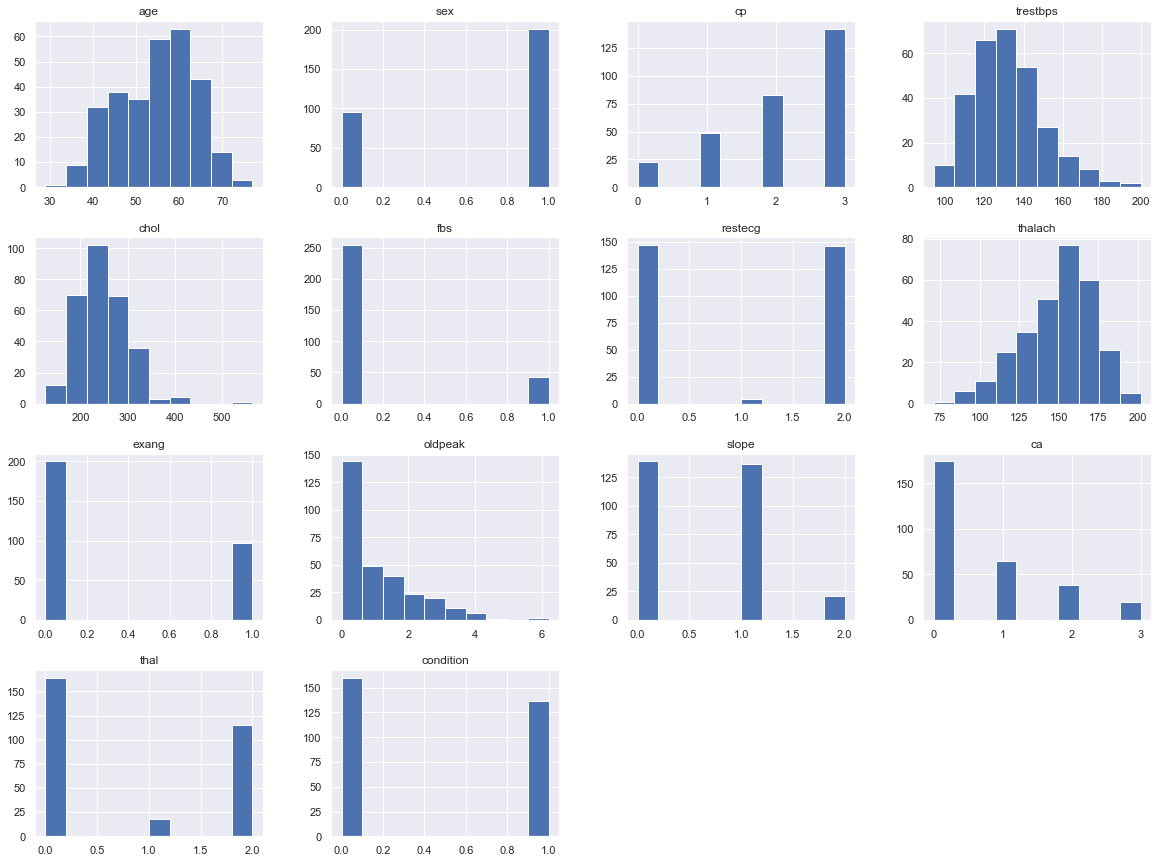

In [117]:
data.hist(figsize=(20,15))

## Построим матрицу корреляции для нахождения отношения между объектами

<AxesSubplot:>

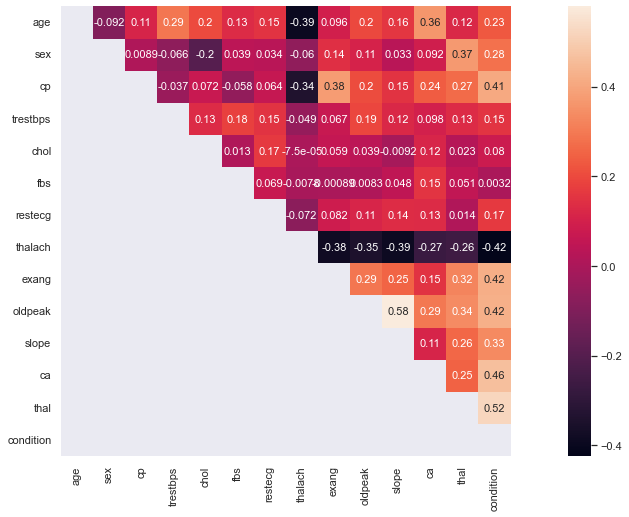

In [119]:
correlations = data.corr()
mask = np.tril(correlations)
sns.heatmap(data=correlations,
                mask = mask,
                annot=True,
                square=True,     # квадратные ячейки
                annot_kws={'fontsize':11},  # размер шрифта для подписей
               )

## Выведем самые коррелирующий признаки с нашей целью предсказания (condition)

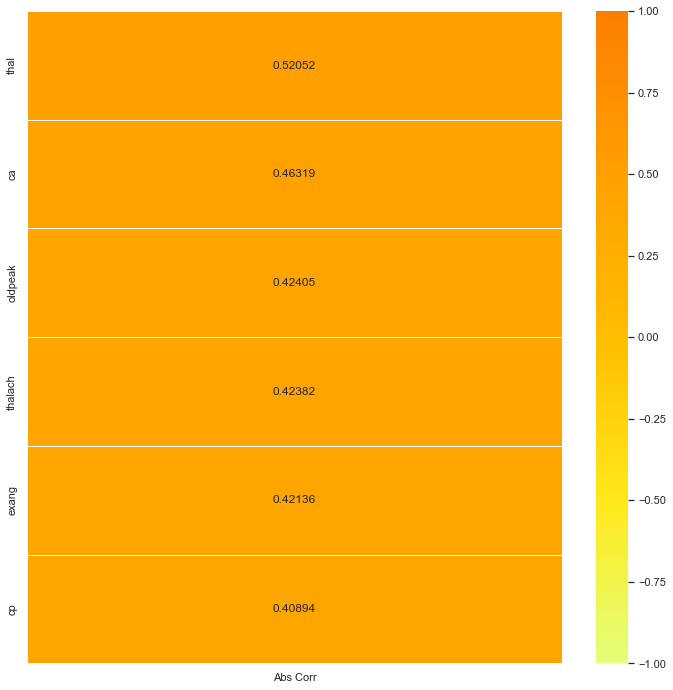

In [120]:
correlations = data.corrwith(data['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

### Произведем удаление сильно коррелирующих признаков (> 0.35) с нашим целевым значением

In [121]:
deleted_columns = [x for x in sorted_correlations.to_frame()[sorted_correlations>=.35]['Abs Corr'].index]
data = data.drop(deleted_columns, axis = 1)

## Произведем поиск выбросов с их последующим удалением

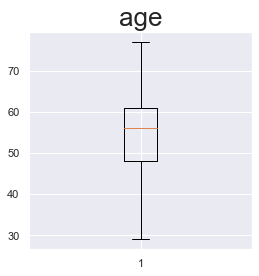

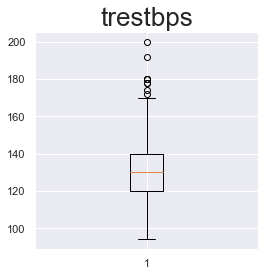

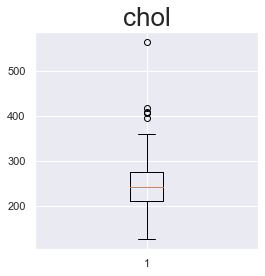

In [122]:
categorical = [i for i in data.loc[:, data.nunique()<=10]]
continuous = [i for i in data.loc[:, data.nunique()>=10]]

continuous_data = data[continuous]

lines_of_emissions = set()
labels = continuous
for cur_label in labels:
    plt.figure(figsize=(4, 4))
    plt.rc('font', size=20)
    
    bp = plt.boxplot(continuous_data[cur_label])
    for cur_emissions in list(np.where(data[cur_label] < bp['whiskers'][0].get_ydata()[1]))[0]:
        print(cur_emissions)
        lines_of_emissions.add(cur_emissions)
    
    for cur_emissions in list(np.where(data[cur_label] > bp['whiskers'][1].get_ydata()[1]))[0]:
        lines_of_emissions.add(cur_emissions)

    plt.title(cur_label, fontsize=26)
    plt.show()


In [123]:
data = data.drop(list(lines_of_emissions))

In [129]:
print(f'Кол-во строк: {data.shape[0]}')
print(f'Кол-во столбцов: {data.shape[1]}')
data.head(10)

Кол-во строк: 283
Кол-во столбцов: 8


,age,sex,trestbps,chol,fbs,restecg,slope,condition
0,69,1,160,234,1,2,1,0
1,69,0,140,239,0,0,0,0
2,66,0,150,226,0,0,2,0
3,65,1,138,282,1,2,1,1
4,64,1,110,211,0,2,1,0
5,64,1,170,227,0,2,1,0
6,63,1,145,233,1,2,2,0
7,61,1,134,234,0,0,1,1
8,60,0,150,240,0,0,0,0
10,59,1,170,288,0,2,1,1
